In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd

import sys
sys.path.append('../')
import pylars

In [6]:
from pylars.processing.rawprocessor import simple_processor

from pylars.processing.waveforms import waveform_processing
from pylars.processing.pulses import pulse_processing

In [7]:
from pylars.plotting.plotwaveforms import *
from pylars.plotting.plotprocessed import *

In [7]:
process = pylars.processing.simple_processor(sigma_level=5, baseline_samples=50)
data_path = '/disk/gfs_atp/xenoscope/SiPMs/char_campaign/raw_data/run6/room_temp_21072022/LED_ON_300K_51_0V/Module0/LED_ON_300K_51_0V_Module_0_0.root'
process.load_raw_data(data_path, 49,300)

### Processing:

In [8]:
results = process.process_all_channels()

Processing channel wf6: 100%|██████████████████████████████████| 20000/20000 [00:03<00:00, 6501.61it/s]


array([<AxesSubplot:xlabel='Area [integrated ADC counts]', ylabel='# events'>,
       <AxesSubplot:xlabel='Length [# samples]', ylabel='# events'>,
       <AxesSubplot:xlabel='Position [sample #]', ylabel='# events'>],
      dtype=object)

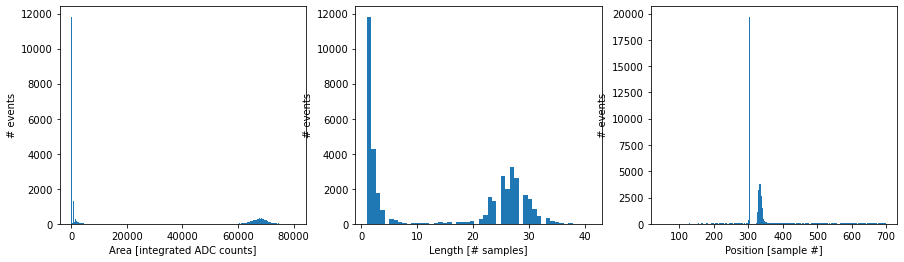

In [11]:
plot_3hists(results[results['channel']=='wf6'])

In [13]:
cut_mask = ((results['position'] > 300) &
            (results['position'] < 380))

array([<AxesSubplot:xlabel='Area [integrated ADC counts]', ylabel='# events'>,
       <AxesSubplot:xlabel='Length [# samples]', ylabel='# events'>,
       <AxesSubplot:xlabel='Position [sample #]', ylabel='# events'>],
      dtype=object)

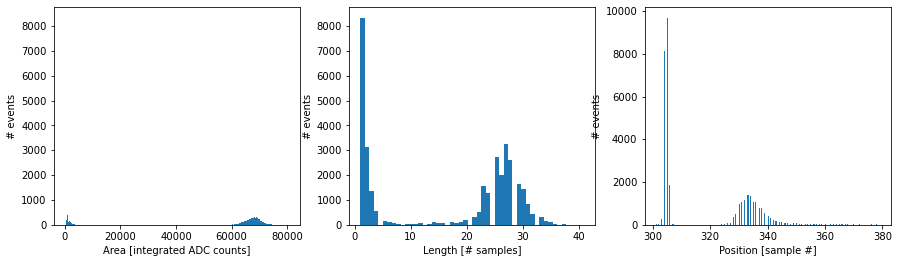

In [22]:
plot_3hists(results[cut_mask & (results['channel']=='wf6')])

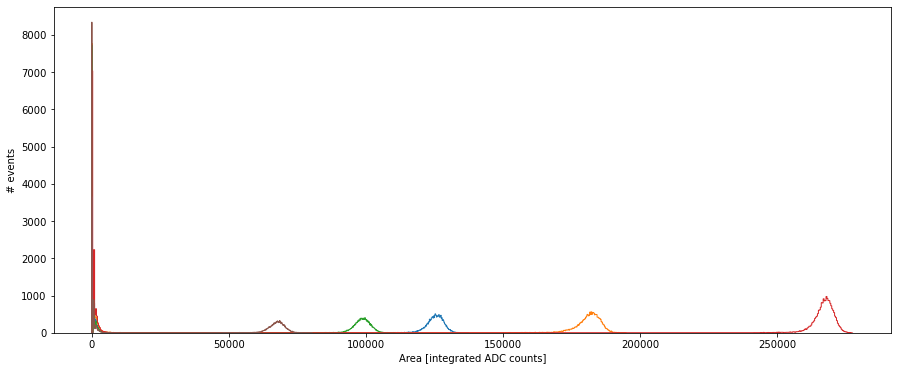

In [29]:
fig, ax = plt.subplots(1,1, figsize = (15,6))
for _ch in process.raw_data.channels:
    ax = plot_hist_area(results[cut_mask & (results['channel']==_ch)], ax = ax)
plt.show()